In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')

In [3]:
import yfinance as yf

# Define the stock symbol and date range
stock_symbol = 'RELIANCE.NS'
start_date = '2000-01-01'
end_date = '2023-10-18'

# Fetch the data
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Show the data
print(df)


[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03    36.747459    38.944569    36.747459    38.944569    29.579708   
2000-01-04    39.981236    42.062302    38.882679    42.062302    31.947733   
2000-01-05    39.710464    44.545658    39.710464    43.710136    33.199314   
2000-01-06    44.715855    46.526150    44.715855    45.543640    34.591923   
2000-01-07    45.644211    49.187443    45.334759    48.669109    36.965824   
...                 ...          ...          ...          ...          ...   
2023-10-11  2314.449951  2349.699951  2313.000000  2345.050049  2345.050049   
2023-10-12  2343.850098  2359.350098  2338.149902  2349.399902  2349.399902   
2023-10-13  2340.000000  2357.500000  2329.149902  2349.300049  2349.300049   
2023-10-16  2345.000000  2354.550049  2336.000000  2344.050049

In [4]:
df.shape

(5941, 6)

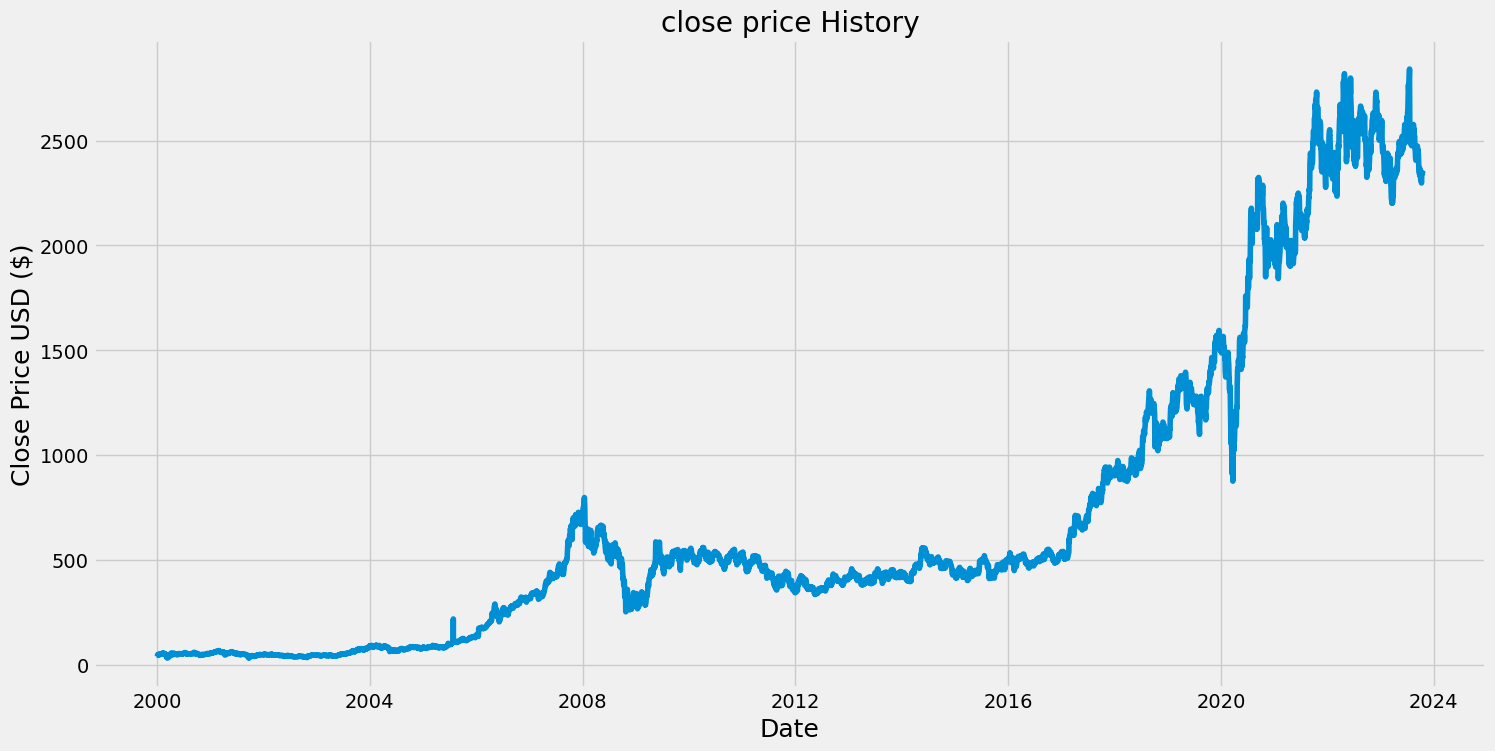

In [5]:
plt.figure(figsize = (16,8))
plt.title('close price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

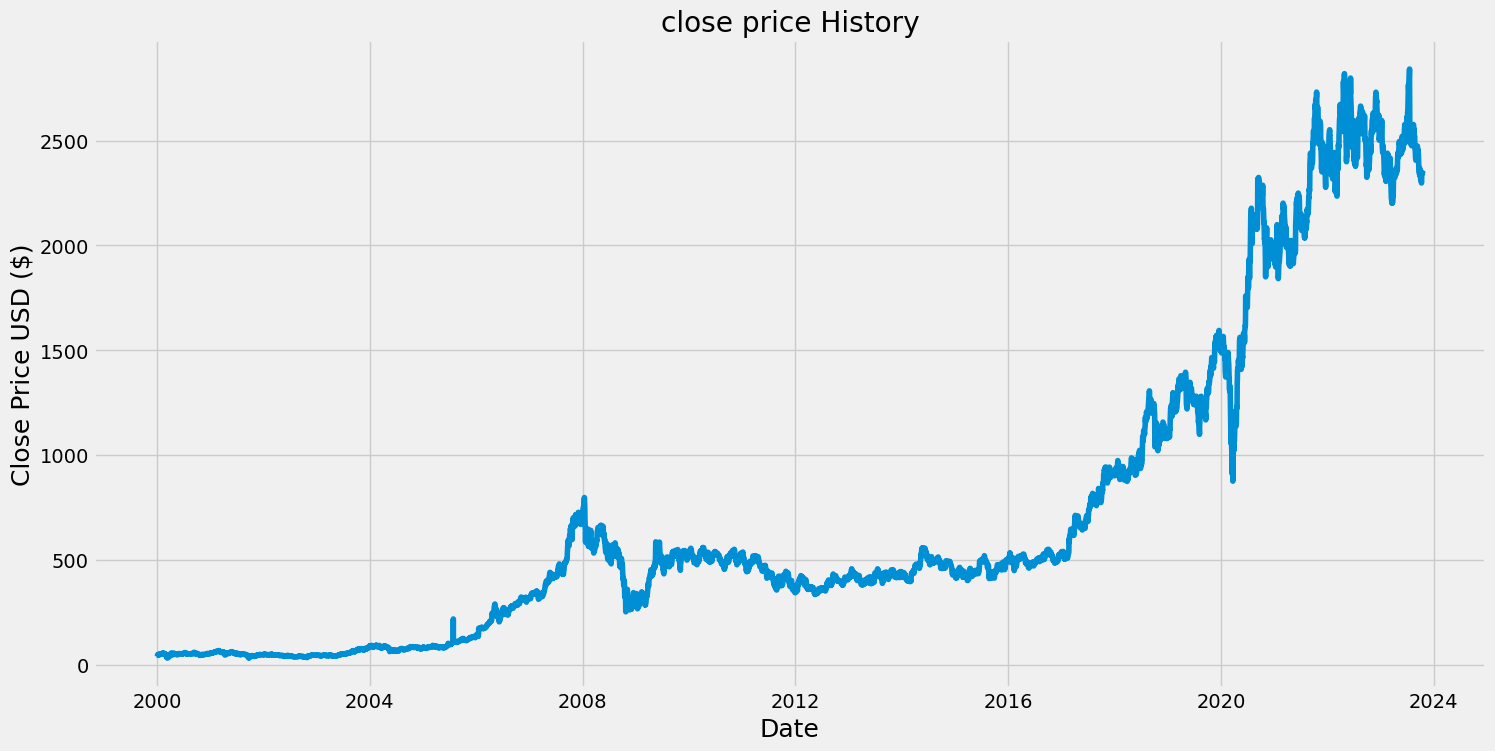

4753

In [6]:

plt.figure(figsize = (16,8))
plt.title('close price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()
data = df.filter(['Close'])
dataset= data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

In [7]:
import math
#Create a new dataframe with only the 'Close Column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#get the number of row to train the model on
training_data_len = math.ceil(len(dataset)* (.8))
training_data_len


4753

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00267015],
       [0.0037795 ],
       [0.00436583],
       ...,
       [0.82474084],
       [0.82287279],
       [0.82685795]])

In [9]:
train_data = scaled_data[0:training_data_len ,:]
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
      print(x_train)
      print(y_train)
      print()

[array([0.00267015, 0.0037795 , 0.00436583, 0.00501823, 0.00613034,
       0.00579725, 0.00469616, 0.00542288, 0.00598169, 0.00622668,
       0.00581102, 0.00611107, 0.00640836, 0.00603674, 0.00677998,
       0.00676897, 0.00642763, 0.00642763, 0.00725345, 0.00744064,
       0.00687908, 0.0072039 , 0.00753974, 0.00762232, 0.00775995,
       0.00772967, 0.00766361, 0.00810405, 0.00839859, 0.00881425,
       0.00819764, 0.00777097, 0.00798017, 0.00833252, 0.00805174,
       0.00784254, 0.00722042, 0.00696992, 0.00735255, 0.00690385,
       0.0071516 , 0.00592663, 0.00625421, 0.00487509, 0.00359232,
       0.00279402, 0.00215264, 0.00163788, 0.00154704, 0.0007515 ,
       0.        , 0.00088087, 0.00184708, 0.00174248, 0.00174248,
       0.00174248, 0.0019104 , 0.0022132 , 0.00207831, 0.00205905])]
[0.0031188469297662343]

[array([0.00267015, 0.0037795 , 0.00436583, 0.00501823, 0.00613034,
       0.00579725, 0.00469616, 0.00542288, 0.00598169, 0.00622668,
       0.00581102, 0.00611107, 0.

In [10]:
import numpy as np

x_train = np.array(x_train, dtype=object)
y_train = np.array(y_train, dtype=object)


In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4693, 60, 1)

In [13]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True , input_shape =(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
#!pip install pydot
#!apt-get install graphviz -y


In [15]:
#from tensorflow.keras.utils import plot_model


In [16]:
#Compile the model
model.compile(optimizer='adam' , loss='mean_squared_error')

In [17]:
import numpy as np

# Convert x_train and y_train to NumPy arrays with compatible data types (e.g., float32)
x_train = np.array(x_train, dtype=np.int64)
y_train = np.array(y_train, dtype=np.int64)

# Then, train your model
model.fit(x_train, y_train, batch_size=1, epochs=1)


4693/4693 [==============================] - 183s 38ms/step - loss: 0.0000e+00


In [18]:
#create the testing dataset
#create a new array conatining scaled values from index 1542 to 2002
test_data = scaled_data[training_data_len- 60:, : ]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [19]:
#convert the data to a numpy array
x_test= np.array(x_test)

In [20]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [21]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

38/38 [==============================] - 3s 32ms/step


In [22]:
#Get the root mean square error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

1971.6083931393093

C:\Users\Nehal\AppData\Local\Temp\ipykernel_18912\3113054946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


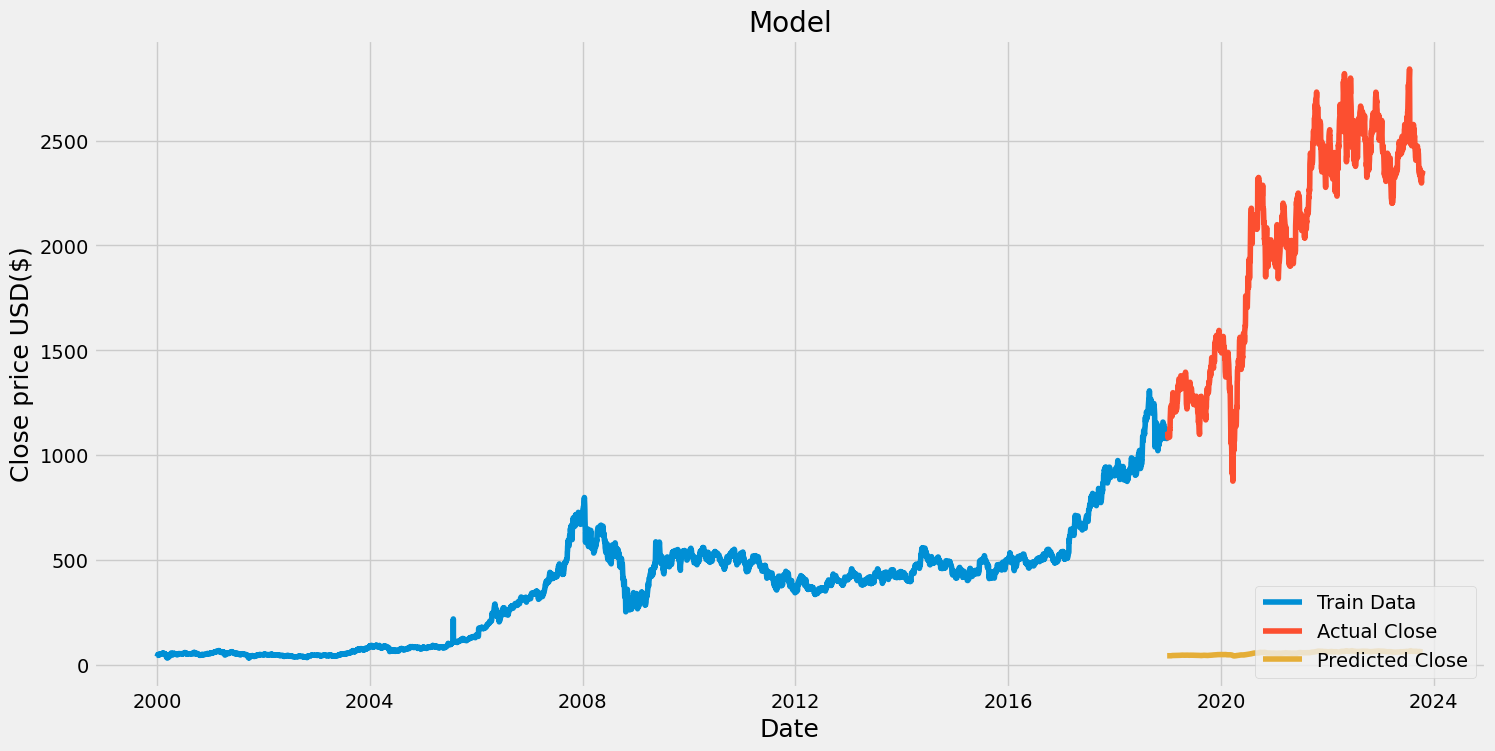

In [23]:
# Plot the data
train = data[:training_data_len]  # Define 'train' here
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)

plt.plot(train['Close'], label='Train Data')  # Use 'train' variable here
plt.plot(valid['Close'], label='Actual Close')
plt.plot(valid['Predictions'], label='Predicted Close')

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [24]:
valid

,Close,Predictions
Date,,
2018-12-28,1114.981079,42.753006
2018-12-31,1110.721436,42.701103
2019-01-01,1110.473877,42.669617
2019-01-02,1096.010864,42.658192
2019-01-03,1082.489136,42.686672
...,...,...
2023-10-11,2345.050049,61.640236
2023-10-12,2349.399902,61.439457
2023-10-13,2349.300049,61.261341


In [25]:
#apple_quote = apple_quote.astype('int', errors='ignore')

# Display the dataframe after conversion
#print("\nDataFrame after converting all columns to integers:")
#print(apple_quote)
#print(apple_quote.dtypes)

In [26]:
from sklearn.preprocessing import MinMaxScaler
# Replace 'Reliance.NS' with the desired stock symbol
stock_symbol = 'RELIANCE.NS'
start_date = '2000-01-01'
end_date = '2023-10-18'

# Fetch the data using yfinance
apple_quote = yf.download(stock_symbol, start=start_date, end=end_date)

# Create a new DataFrame
new_df = apple_quote.filter(['Close'])

# Get the last 60 days' closing price values and convert the DataFrame to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
last_60_days_scaled = scaler.fit_transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
# Assuming you have defined and trained the 'model' somewhere in your code
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 50ms/step
[[2298.5754]]


In [27]:
stock_symbol = 'RELIANCE.NS'
start_date = '2000-01-01'
end_date = '2023-10-18'

# Fetch the data using yfinance
apple_quote = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the 'Close' column of the DataFrame
print(apple_quote['Close'])


[*********************100%%**********************]  1 of 1 completed
Date
2000-01-03      38.944569
2000-01-04      42.062302
2000-01-05      43.710136
2000-01-06      45.543640
2000-01-07      48.669109
                 ...     
2023-10-11    2345.050049
2023-10-12    2349.399902
2023-10-13    2349.300049
2023-10-16    2344.050049
2023-10-17    2355.250000
Name: Close, Length: 5941, dtype: float64
